# Logistic Regression 

In this notebook I will be creating and optimising a binary classification model using Logisitic Regression. The data has already been cleaned and any categorical data has been converted into numerical data as shown below.

In [60]:
 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix, roc_curve, auc, roc_auc_score, precision_score,f1_score,recall_score, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler




In [115]:
df = pd.read_csv('my_full_data.csv')
df 

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,0,68387134,2500.0,0,17.27,89.47,3,1,1,50000.0,...,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,1,66615254,7200.0,0,17.27,257.67,3,9,4,20000.0,...,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,2,68376899,16000.0,0,10.78,522.16,1,5,5,63000.0,...,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,3,68366850,16000.0,0,5.32,481.84,0,8,1,96000.0,...,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,4,67195202,13000.0,1,16.59,320.23,3,10,5,40000.0,...,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,26113,90441274,12000.0,0,13.99,410.08,2,0,5,47000.0,...,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,26114,90404436,25000.0,1,25.69,743.94,5,6,1,70000.0,...,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,26115,90393111,16000.0,0,12.79,537.49,2,1,4,48000.0,...,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,26116,90304259,35000.0,1,15.59,843.53,2,1,1,180000.0,...,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


In [462]:
print(df['loan_status']) #Our target variable

0        1
1        0
2        0
3        1
4        0
        ..
26113    1
26114    0
26115    1
26116    1
26117    1
Name: loan_status, Length: 26118, dtype: int64


## Baseline model  

Our data is ready to be split into our training and testing data. I will perform the basic Logisitic Regression classsifier from the `sklearn` package which later on in this notebook I will look to optimise it via comaprison with performance metrics. First I will take our target variable the loan status and drop it from the data, perform our cross validation and examine performance and information such as the shape of each split, the model accuracy, classfication report and confusion matrix.

In [116]:
y = df['loan_status'] 
X = df.drop(columns=['id', 'loan_status'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((20894, 20), (5224, 20))

We will be using the built in Logisitic Regression function without altering any hyperparameters to being with. Such hyperparameters we will look to adjust later inclue the solver, which helps minimise the loss function and the value of C, which affects the regularization with an inverse relationship. Luckily we can later use the `GridSearchCV` technique to tune these and more hyperparameters. 

In [117]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Model accuracy score: 0.8111

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.16      0.27      1144
           1       0.81      0.99      0.89      4080

    accuracy                           0.81      5224
   macro avg       0.85      0.58      0.58      5224
weighted avg       0.83      0.81      0.75      5224

Confusion Matrix:
 [[ 180  964]
 [  23 4057]]
Precision: 0.81
Recall: 0.99
F1 Score: 0.89


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The warning given indicates that to maybe look at increasing the max iterations or scaling the data may be helpful, and more specifically it struggles when using the default `lbfgs` solver.

It might be useful to see how represent a normalised version of this confusion matrix to compare easily with other models. We can see below that its performance with regards to prectiting when a loan will be paid is far superior to predcting when a loan will not be paid.

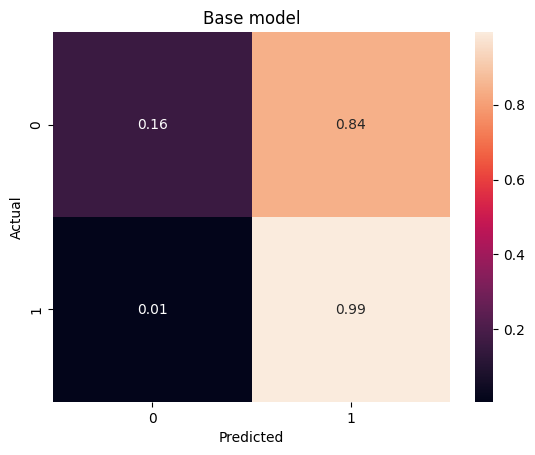

In [118]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f',)
plt.title('Base model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see a low level of precision in this model as there were a large percentage of the loan_status=0 that was predicted to be fully paid back, which makes the base model not appropiate at all for a risk-averse loaner.

We must also check if the model accuracy is good by comapring it to the accuracy of a model that only predicts the most popular option, in this case the loan being paid back. 

In [17]:
null_accuracy = (4080/(4080+1144))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7810


Model accuracy is slightly higher so we can say that it is performing okay, but the difference is only around 3% which we can hopefully improve. 

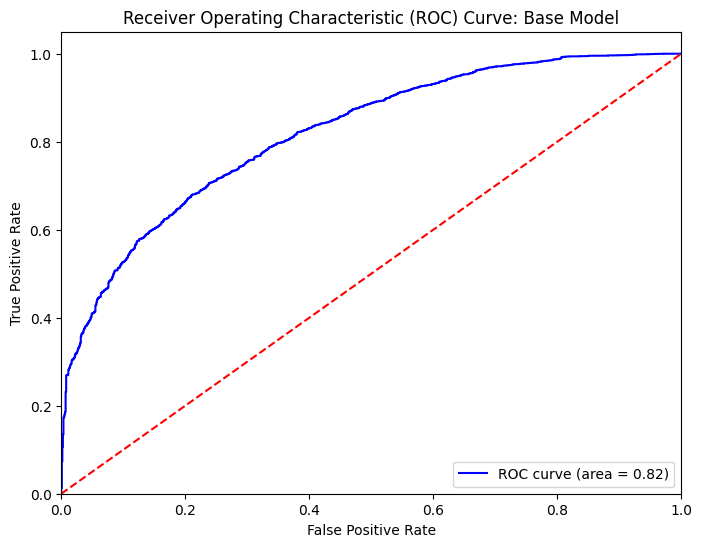

In [119]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Base Model')
plt.legend(loc='lower right')
plt.show()

This concludes our analysis of how the baseline model performs without any adjustments to the data, predictive paramteres used etc. We will look to improve metrics such as the AUC, True Negative rate. It is important to consider which metrics are best to optimise for the purpose of our data set.


## What are we looking to maximise? 
We first must consider what metrics are important to us. Things like the model accuracy provide a general idea on how the model is performing, but can be suceptible to class imbalance. In the case of loan approval, it is most costly to approve loans that end up defaulting. Hence we would like the model to have a high precision. In most cases, the False Negative rate does not need to be minismied as for a risk-averse loaner, the cost of missing out on giving someone a loan who could have payed it back fully is far less than being too risk-loving and approving a loan to someone who is going to default it. 

From the data above, we have seen there is a big class imbalance between the amount of loans not fully paid (around 20%) and the loans which were fully paid. Hence metrics like the area under and ROC cruve(AUC-ROC and AUC-PR) and F1 score become more informative than other metrics.

## Adjustments
### 1. Optimising Hyperparameters 
It is clear that the model could do with some hyperparameter tuning. We will use the `GridSearchCV` to go through different paramter conditions and idnetifying which are best for maximising the F1 score. We choose the F1 score at first to stop the model being too conservative if we scored based on precision, as the F1 score will acount for a balance between precision and recall. We can then compare using a precision scoring to how the parameters differ and see which paramters we wish to go ahead with, as we may prefer to sacrifice some recall if we are a more risk-averse loaner.


In [468]:
param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear' ], #using other solvers caused errors with number of iterations so liblinear is only viable option
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'C': 100, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


From this we can see that the best hyper parameters are C= 10, max iterations = 500, penalty = l1, solver= liblinear, tol=0.0001. Now lets run the same performance tests as earlier to comapare base model.

In [120]:
model_1 = LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001)

model_1.fit(X_train, y_train)
y_pred_1= model_1.predict(X_test)

precision= precision_score(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Model accuracy score: 0.8876

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.72      1144
           1       0.91      0.95      0.93      4080

    accuracy                           0.89      5224
   macro avg       0.85      0.81      0.83      5224
weighted avg       0.88      0.89      0.88      5224

Confusion Matrix:
 [[ 773  371]
 [ 216 3864]]
Precision: 0.91
Recall: 0.95
F1 Score: 0.93


As stated earlier, we may want to look at just maximising the precision, hence lets do a grid search scoring against precision

In [470]:
param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'max_iter': [ 500, 1000, 2000],
    'tol': [1e-4, 1e-3],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='precision', cv=5, verbose=1) #testing against precision instead

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


We actually see that the same hyperparameters maximise precision as the F1 score (when running the code sometimes the regulation C outputs c=10, or c=100, indicating they are interchangable and have negligible difference), which is not surprising, so we will go forward using the updated hyperparameters model. Lets compare the ROC curve against the base model.

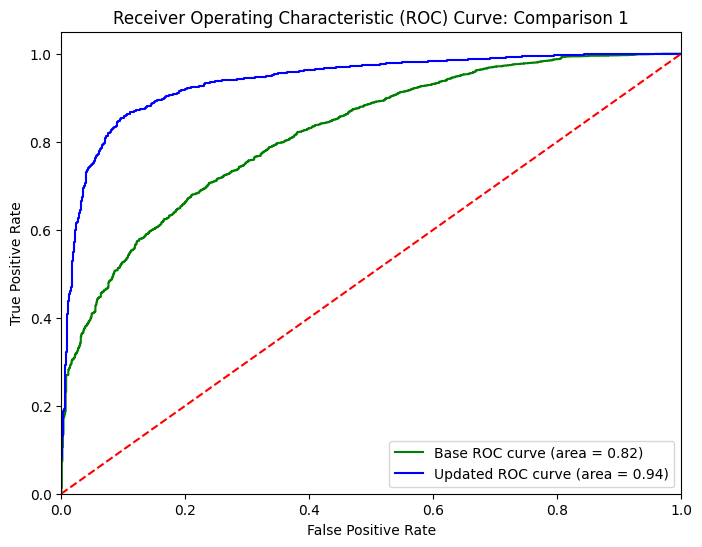

In [121]:
y_scores_1 = model_1.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_scores_1)
roc_auc_1 = auc(fpr_1, tpr_1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Updated ROC curve (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 1')
plt.legend(loc='lower right')
plt.show()

We notice a much improved ROC curve now, showing that the updated classifier has much better classification ability.

### 2. Class Imbalances 
#### 2.1 Weighted approach
As stated above, class imbalance could be a problem affecting the model at the moment. The accurate predicition of a loan defaulting is important however one may argue its more important to predict correctly that a loan will be payed back rather than incorrectly rejecting a loan. So although the class imbalance is affecting the recall and False Negative rate it is not of upmost improtant to a risk-averse loanee. However we will still test metrics over a more balanced data set. 

In logisitic regression, we use weighted classes and its best practice to use the inverse of the label distribution. 78% of the data is in the loan_status=1 catergory. Below we will do a normalised confusion matrix comaprison between unweighted classes and weighted classes.

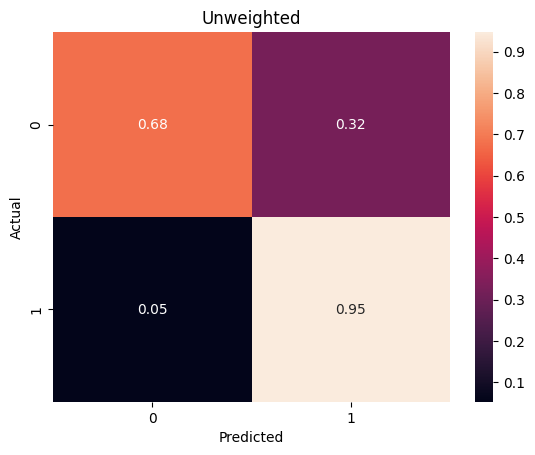

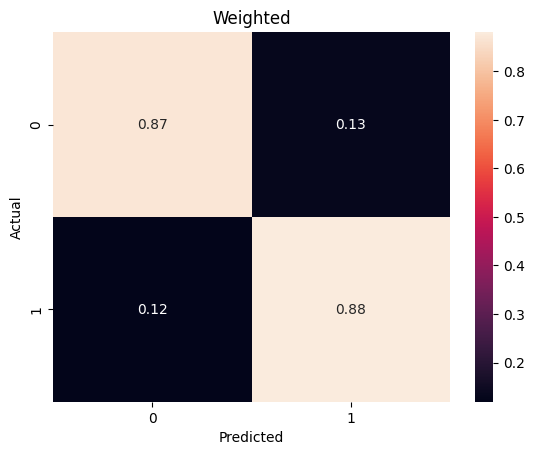

In [122]:
ratio = null_accuracy/(1-null_accuracy)

class_weights={0: ratio, 1: 1} #balanced weights



y_pred_1 = model_1.predict(X_test)


cm_1 = confusion_matrix(y_test, y_pred_1) #confusion matrix of unbalanced weighted classes

cm_1_normalized = cm_1.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_1_normalized, annot=True, fmt='.2f',)
plt.title('Unweighted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

model_w= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001,class_weight=class_weights) #weighted model
model_w.fit(X_train, y_train)
y_pred_w = model_w.predict(X_test)


cm_w = confusion_matrix(y_test, y_pred_w) #confusion matrix of balanced weighted classes

cm_w_normalized = cm_w.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_w_normalized, annot=True, fmt='.2f',)
plt.title('Weighted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



It appears that the weighted version has a better job at reducing the False Positive rate which is our main aim that we are trying to minimise, and maximising the True Negative rate. Lets have a look at all the performance metrics again.

In [123]:
precision= precision_score(y_test, y_pred_w)
recall = recall_score(y_test, y_pred_w)
f1 = f1_score(y_test, y_pred_w)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_w)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Model accuracy score: 0.8786

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.88      0.84      5224
weighted avg       0.90      0.88      0.88      5224

Confusion Matrix:
 [[ 997  147]
 [ 487 3593]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92


We can see that we have sacrificed some recall here, but for the purpose of our data set I think this is a valid amount of compensastion and achieves our purpose better of increasing the precision. Lets look at ROC curve.

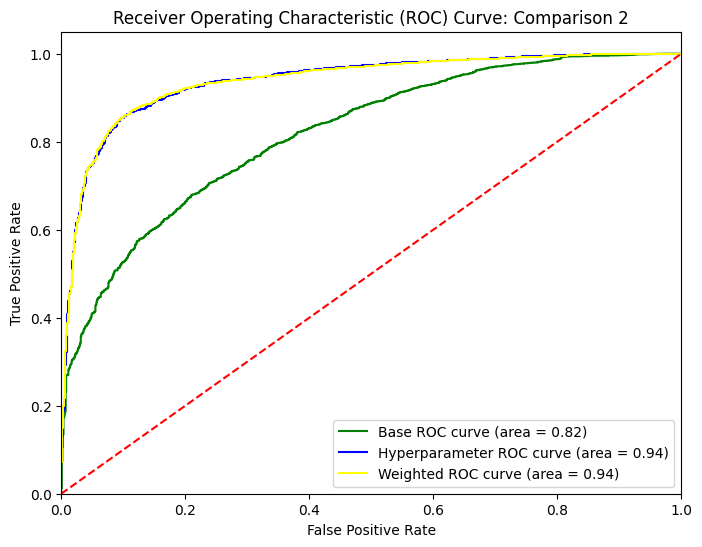

In [124]:
y_scores_w = model_w.predict_proba(X_test)[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(y_test, y_scores_w)
roc_auc_w = auc(fpr_w, tpr_w)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Hyperparameter ROC curve (area = {roc_auc_1:.2f})')
plt.plot(fpr_w, tpr_w, color='yellow', label=f'Weighted ROC curve (area = {roc_auc_w:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 2')
plt.legend(loc='lower right')
plt.show()

We notice the ROC curves the be very similar using the weighted and unweighted version of the model (both have same AUC), hence from this point onwards we will explore updating the weighted model to see whether we can maximise our goal of highest precision without sacrificing too much recall and being too conservative.

Lets also have a look at the precision-recall (PR) curves to see if we can idnetify differences there.

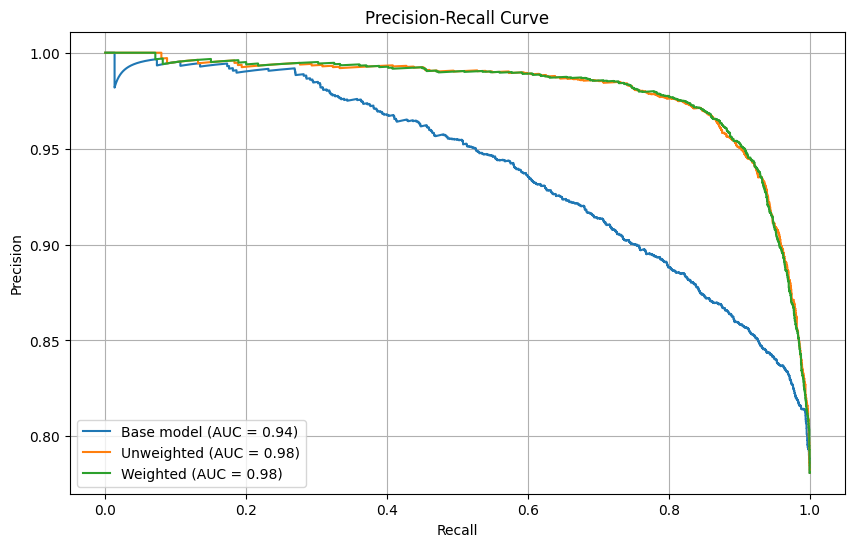

In [125]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
precision_1, recall_1, _ = precision_recall_curve(y_test, y_scores_1)
precision_w, recall_w, _ = precision_recall_curve(y_test, y_scores_w)


auc_model = auc(recall, precision)
auc_model_1 = auc(recall_1, precision_1)
auc_model_w = auc(recall_w, precision_w)


plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Base model (AUC = {auc_model:.2f})')
plt.plot(recall_1, precision_1, label=f'Unweighted (AUC = {auc_model_1:.2f})')
plt.plot(recall_w, precision_w, label=f'Weighted (AUC = {auc_model_w:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Visualing again the difference is difficult to spot between unweighted and weighted version.

#### 2.2 Over-sampling and Under-sampling

There are other methods we can do to handle the class imbalances. First we will look at over-sampling using SMOTE which balances by randomly increasing the minority class examples by creating new examples between exisiting instances. 

In [127]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({1: 16476, 0: 16476})


Now that we have our resampled data lets have a look how it compares

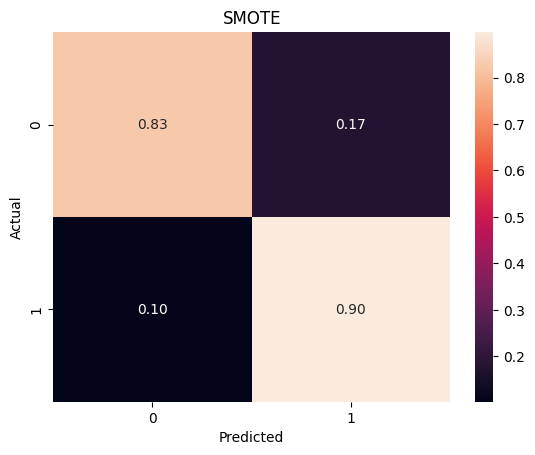

Model accuracy score: 0.8821

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75      1144
           1       0.95      0.90      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.86      0.84      5224
weighted avg       0.89      0.88      0.89      5224

Confusion Matrix:
 [[ 945  199]
 [ 417 3663]]
Precision: 0.95
Recall: 0.90
F1 Score: 0.92


In [128]:
model_SMOTE= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001) 
model_SMOTE.fit(X_train_resampled, y_train_resampled)
y_pred_SMOTE= model_SMOTE.predict(X_test)


cm_SMOTE= confusion_matrix(y_test, y_pred_SMOTE) 

cm_SMOTE_normalized = cm_SMOTE.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_SMOTE_normalized, annot=True, fmt='.2f',)
plt.title('SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

precision= precision_score(y_test, y_pred_SMOTE)
recall = recall_score(y_test, y_pred_SMOTE)
f1 = f1_score(y_test, y_pred_SMOTE)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SMOTE)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_SMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SMOTE))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

It appears to perform well with a higher True Positive rate however it does have a slightly lower precision which is most important to us.

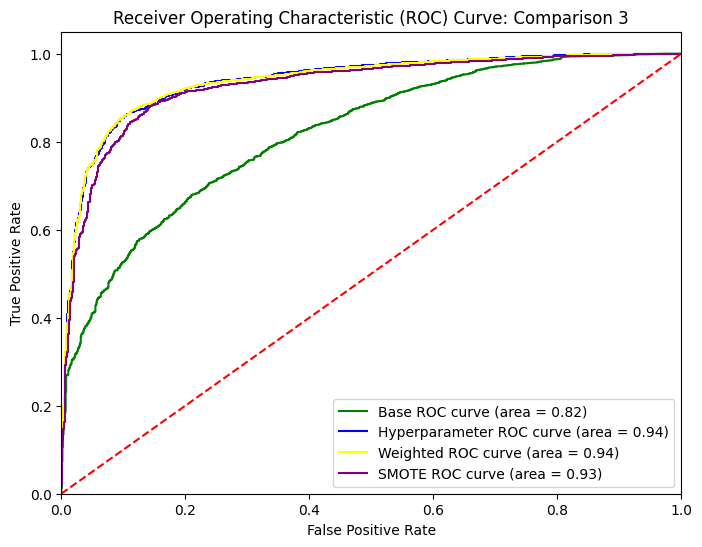

In [129]:
y_scores_SMOTE = model_SMOTE.predict_proba(X_test)[:, 1]
fpr_SMOTE, tpr_SMOTE, thresholds_SMOTE = roc_curve(y_test, y_scores_SMOTE)
roc_auc_SMOTE = auc(fpr_SMOTE, tpr_SMOTE)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Hyperparameter ROC curve (area = {roc_auc_1:.2f})')
plt.plot(fpr_w, tpr_w, color='yellow', label=f'Weighted ROC curve (area = {roc_auc_w:.2f})')
plt.plot(fpr_SMOTE, tpr_SMOTE, color='purple', label=f'SMOTE ROC curve (area = {roc_auc_SMOTE:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 3')
plt.legend(loc='lower right')
plt.show()

ROC curve is slightly worse off however we will use the SMOTE model later under feature scaling to see if it performs better then.

Another method is called undersampling, called the NearMiss algorithm which we can use to randomly eliminate majority class examples.

In [130]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')


Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({0: 4418, 1: 4418})


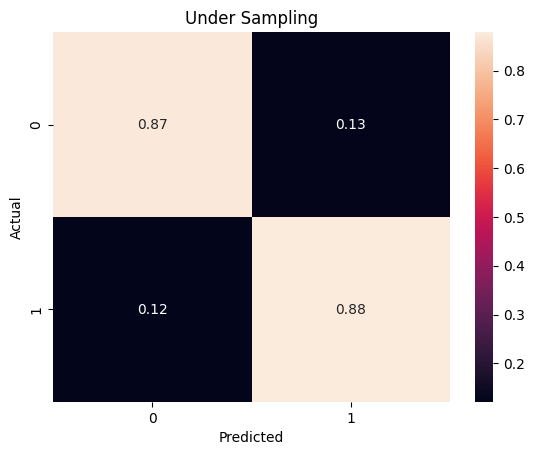

Model accuracy score: 0.8777

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.88      0.84      5224
weighted avg       0.90      0.88      0.88      5224

Confusion Matrix:
 [[1000  144]
 [ 495 3585]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92


In [131]:
model_und= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001) 
model_und.fit(X_train_resampled, y_train_resampled)
y_pred_und= model_und.predict(X_test)


cm_und= confusion_matrix(y_test, y_pred_und) 

cm_und_normalized = cm_und.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_und_normalized, annot=True, fmt='.2f',)
plt.title('Under Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

precision= precision_score(y_test, y_pred_und)
recall = recall_score(y_test, y_pred_und)
f1 = f1_score(y_test, y_pred_und)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_und)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_und))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_und))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

It appears to be the very marginally the best at minimising False Positive rate, which is what we are aiming for.

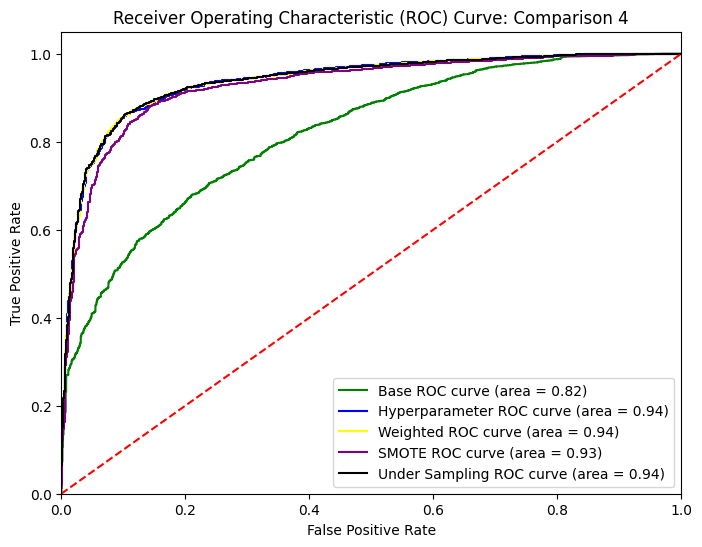

In [132]:
y_scores_und = model_und.predict_proba(X_test)[:, 1]
fpr_und, tpr_und, thresholds_und = roc_curve(y_test, y_scores_und)
roc_auc_und = auc(fpr_und, tpr_und)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Hyperparameter ROC curve (area = {roc_auc_1:.2f})')
plt.plot(fpr_w, tpr_w, color='yellow', label=f'Weighted ROC curve (area = {roc_auc_w:.2f})')
plt.plot(fpr_SMOTE, tpr_SMOTE, color='purple', label=f'SMOTE ROC curve (area = {roc_auc_SMOTE:.2f})')
plt.plot(fpr_und, tpr_und, color='black', label=f'Under Sampling ROC curve (area = {roc_auc_und:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 4')
plt.legend(loc='lower right')
plt.show()

The under sampling model appears to be performing reasonably well and very similar to the weighted model. We will check all these with scaled features also to see if we can get a best performer out the three.

### 3. Feature Scaling

When using Logisitic regression, it is important that our features are scaled properly so when using penalization (in this case l1), the penalization is equal for each feature. It will also help the convergence as logisitic regression uses gradient decent for optimisation. 

In [29]:
print(X_train)
print(X_test)



       Unnamed: 0  loan_amnt  term  int_rate  installment  grade  emp_length  \
14070       14070    10000.0     0      6.49       306.45      0           1   
3012         3012     7000.0     0     16.99       249.54      3           3   
9575         9575    27200.0     0      7.39       844.72      0           5   
7445         7445     4000.0     0      6.72       123.00      0           8   
23102       23102    15000.0     0     11.49       494.57      1           1   
...           ...        ...   ...       ...          ...    ...         ...   
21575       21575     7800.0     0     12.12       259.52      1           2   
5390         5390     8000.0     0     13.99       273.39      2           4   
860           860     8000.0     0     12.59       267.98      2           1   
15795       15795    35000.0     0     12.99      1179.12      2           3   
23654       23654     6000.0     0      9.49       192.17      1           3   

       home_ownership  annual_inc  veri

In [133]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 0.1323321  -0.53776317 -0.58099778 ...  0.91860095 -0.14287807
  -0.14031952]
 [-1.33462824 -0.88031147 -0.58099778 ... -0.6558122  -0.14287807
  -0.14031952]
 [-0.46397707  1.4261804  -0.58099778 ...  0.57299807 -0.14287807
  -0.14031952]
 ...
 [-1.62011374 -0.76612871 -0.58099778 ... -0.04140707 -0.14287807
   2.63604038]
 [ 0.36117154  2.31680597 -0.58099778 ... -0.42541027 -0.14287807
  -0.14031952]
 [ 1.40375078 -0.99449424 -0.58099778 ... -0.96301476 -0.14287807
  -0.14031952]]
[[-0.48016165 -0.53776317 -0.58099778 ...  0.41939678 -0.14287807
  -0.14031952]
 [-0.69600036 -1.108677   -0.58099778 ... -0.42541027  6.99897463
  -0.14031952]
 [ 0.20914255  0.87810312 -0.58099778 ...  1.07220224 -0.14287807
  -0.14031952]
 ...
 [-0.87641871  2.03134906  1.72117699 ...  0.72659935 -0.14287807
  -0.14031952]
 [ 0.32920035 -0.7204556  -0.58099778 ...  0.61139839 -0.14287807
  -0.14031952]
 [-0.32428551 -0.70903732 -0.58099778 ... -0.80941348 -0.14287807
   2.63604038]]


We can see that the data is now standardised, lets see if this will affect the performance dramatically.

Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({0: 4418, 1: 4418})
Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({1: 16476, 0: 16476})


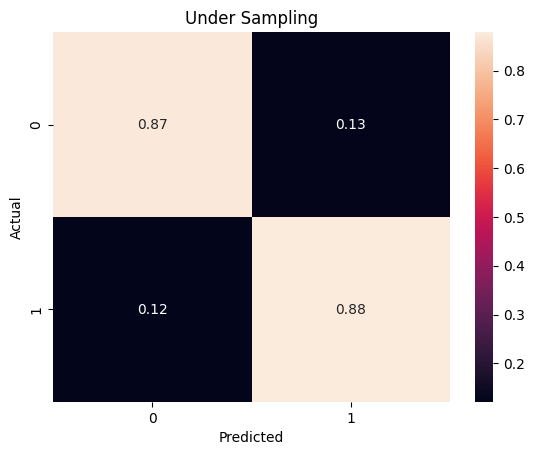

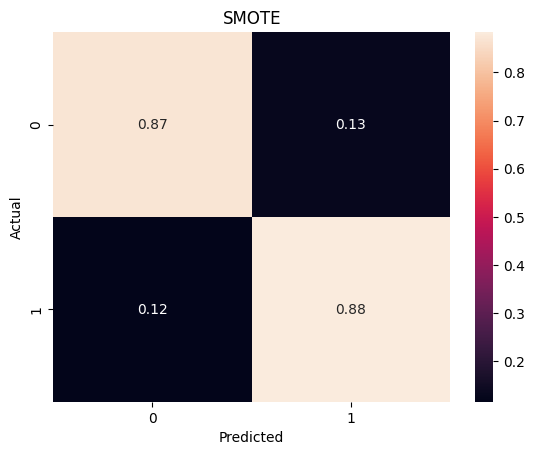

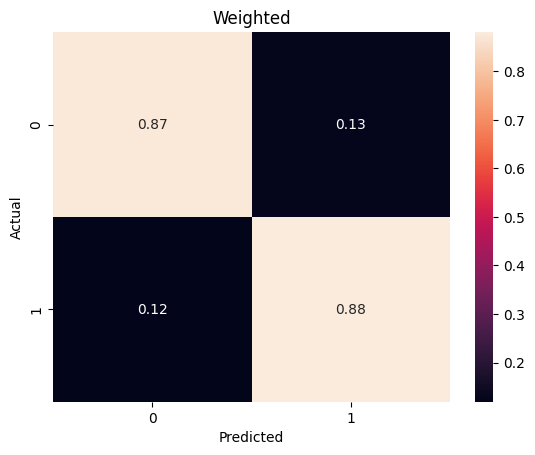

Under Sampling Model accuracy score: 0.8777

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.88      0.84      5224
weighted avg       0.90      0.88      0.88      5224

Confusion Matrix:
 [[1000  144]
 [ 495 3585]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92
Over Sampling Model accuracy score: 0.8806

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.88      0.84      5224
weighted avg       0.90      0.88      0.89      5224

Confusion Matrix:
 [[ 994  150]
 [ 474 3606]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92
Weighted Model accuracy score

In [134]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

model_und= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001) 
model_und.fit(X_train_resampled, y_train_resampled)
y_pred_und= model_und.predict(X_test)



smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

model_SMOTE= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001) 
model_SMOTE.fit(X_train_resampled, y_train_resampled)
y_pred_SMOTE= model_SMOTE.predict(X_test)


model_w= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001,class_weight=class_weights) 
model_w.fit(X_train, y_train)
y_pred_w = model_w.predict(X_test)



cm_und= confusion_matrix(y_test, y_pred_und) 

cm_und_normalized = cm_und.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_und_normalized, annot=True, fmt='.2f',)
plt.title('Under Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_SMOTE= confusion_matrix(y_test, y_pred_SMOTE) 

cm_SMOTE_normalized = cm_SMOTE.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_SMOTE_normalized, annot=True, fmt='.2f',)
plt.title('SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


cm_w= confusion_matrix(y_test, y_pred_w) 

cm_w_normalized = cm_w.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_w_normalized, annot=True, fmt='.2f',)
plt.title('Weighted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

precision= precision_score(y_test, y_pred_und)
recall = recall_score(y_test, y_pred_und)
f1 = f1_score(y_test, y_pred_und)

print('Under Sampling Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_und)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_und))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_und))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

precision= precision_score(y_test, y_pred_SMOTE)
recall = recall_score(y_test, y_pred_SMOTE)
f1 = f1_score(y_test, y_pred_SMOTE)

print('Over Sampling Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SMOTE)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_SMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SMOTE))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


precision= precision_score(y_test, y_pred_w)
recall = recall_score(y_test, y_pred_w)
f1 = f1_score(y_test, y_pred_w)

print('Weighted Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_w)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


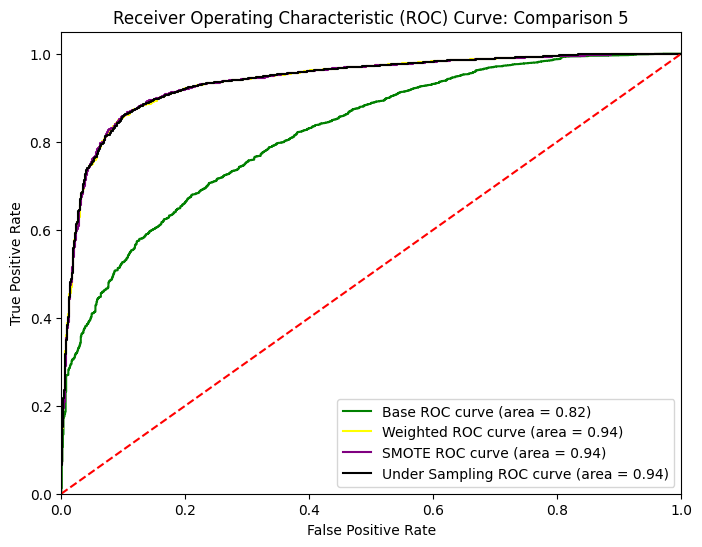

In [135]:
y_scores_w = model_w.predict_proba(X_test)[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(y_test, y_scores_w)
roc_auc_w = auc(fpr_w, tpr_w)

y_scores_SMOTE = model_SMOTE.predict_proba(X_test)[:, 1]
fpr_SMOTE, tpr_SMOTE, thresholds_SMOTE = roc_curve(y_test, y_scores_SMOTE)
roc_auc_SMOTE = auc(fpr_SMOTE, tpr_SMOTE)

y_scores_und = model_und.predict_proba(X_test)[:, 1]
fpr_und, tpr_und, thresholds_und = roc_curve(y_test, y_scores_und)
roc_auc_und = auc(fpr_und, tpr_und)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_w, tpr_w, color='yellow', label=f'Weighted ROC curve (area = {roc_auc_w:.2f})')
plt.plot(fpr_SMOTE, tpr_SMOTE, color='purple', label=f'SMOTE ROC curve (area = {roc_auc_SMOTE:.2f})')
plt.plot(fpr_und, tpr_und, color='black', label=f'Under Sampling ROC curve (area = {roc_auc_und:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 5')
plt.legend(loc='lower right')
plt.show()

We notice there was no a major difference in performance after scaling the training and testing data, which I'd say is somewhat suprising as usually LOgisitic Regression models are highly affected by scaling, suggesting that the original data was already reasonably well scaled. We notice all three weighting methods perform relatively similar, from here on we have used the weighted model to adapt, as all performance metrics were almost identical.

To clarify, the model being updated is the tuned hyperparamater model, with weighted classes, and scaled features.

### 4. Correlation 

Logisitic Regression is heavily influenced by correlation between predicitive powers, as the model assumes independence amongst the vairables. We can also drop variables from the model that have little to no corrleation to the target variable. We can also look to get rid of variables that don't have much importance in the model, based on the size of their coefficients in the model. 

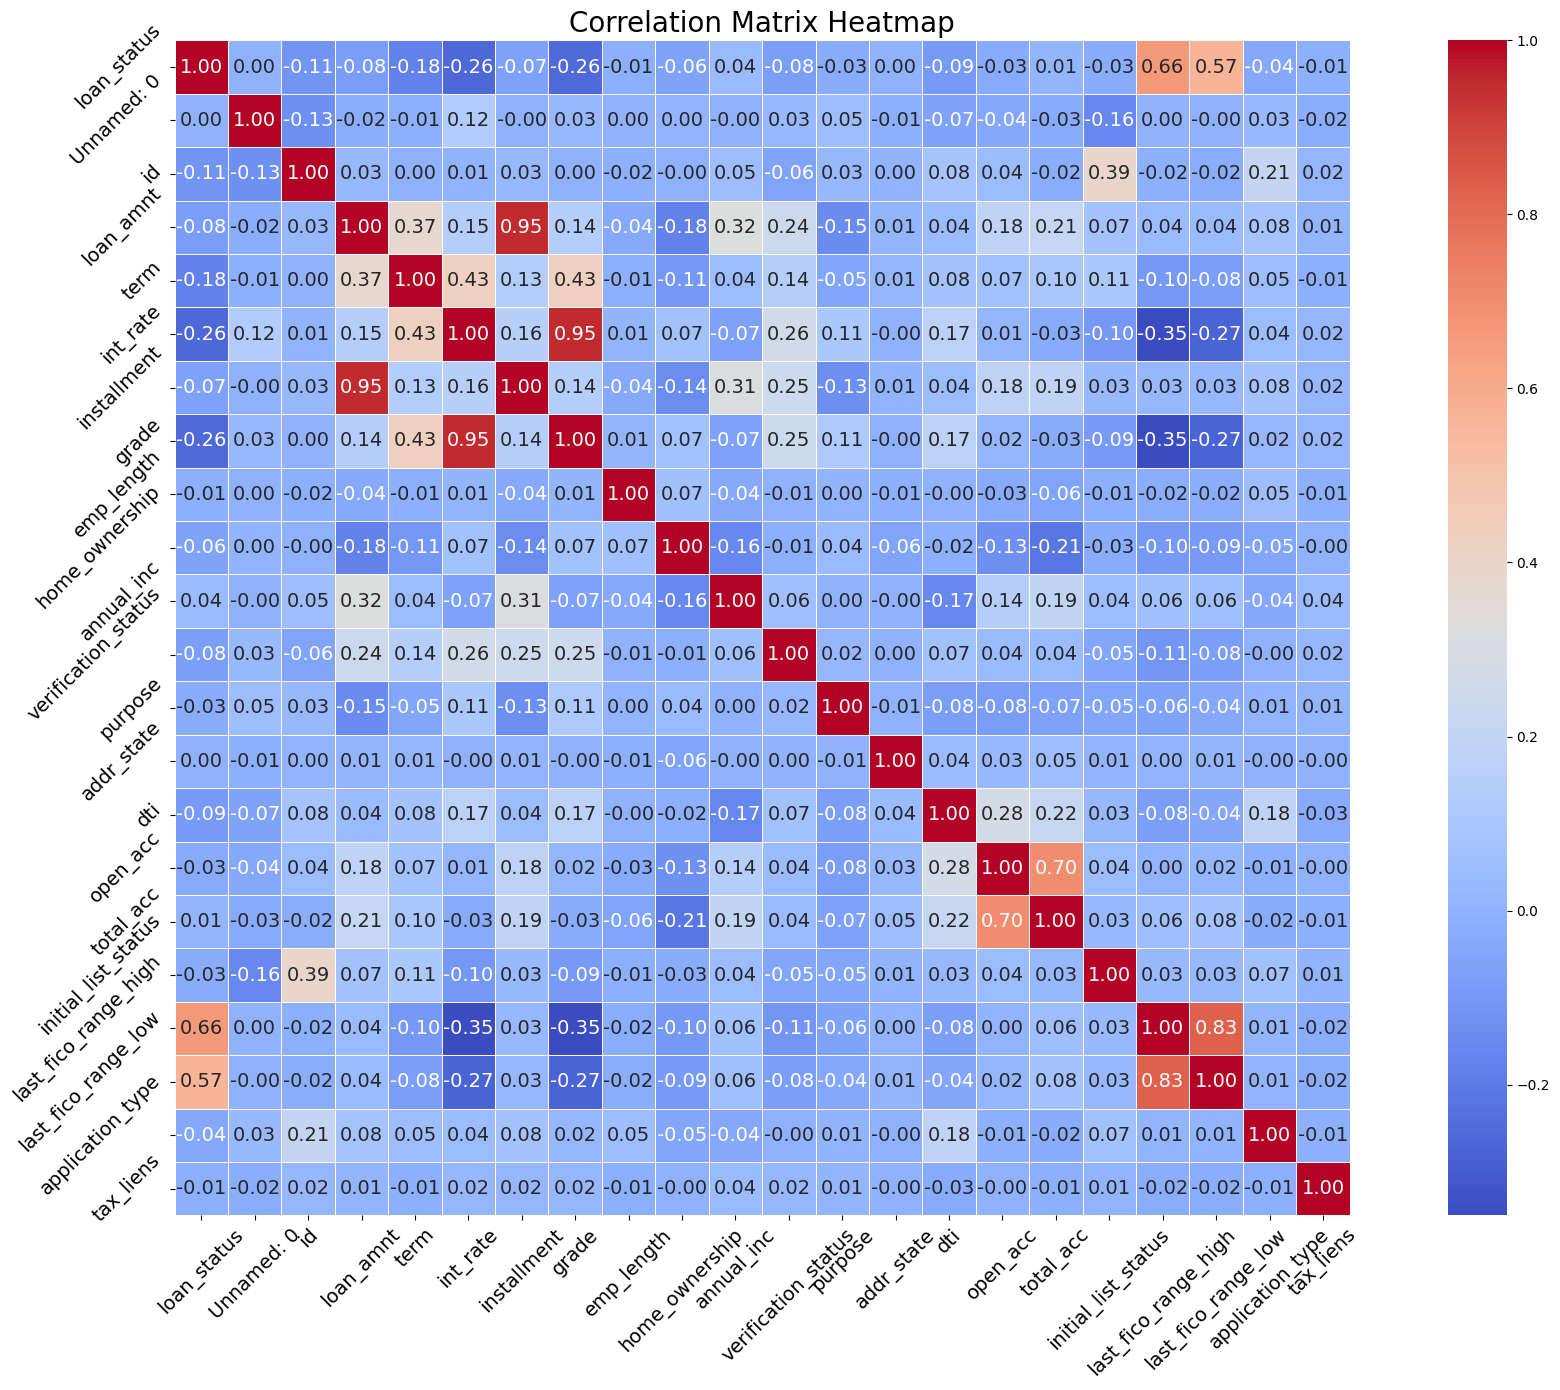

In [136]:
new_order = ['loan_status'] + [col for col in df.columns if col != 'loan_status']
df = df[new_order]

corr = df.corr()

plt.figure(figsize=(20, 14))  

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5) 


plt.title("Correlation Matrix Heatmap", fontsize=20)  
plt.xticks(rotation=45, fontsize=14)  
plt.yticks(rotation=45, fontsize=14)  
plt.tight_layout()  

plt.show()

In [137]:
coefficients = model_w.coef_[0]
feature_importance = np.abs(coefficients) / np.sum(np.abs(coefficients))
f_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(f_importance_df)


Feature Importance:
                 Feature  Importance
16  last_fico_range_high    0.532399
1              loan_amnt    0.092651
3               int_rate    0.048003
17   last_fico_range_low    0.047408
2                   term    0.041590
18      application_type    0.034504
12                   dti    0.032786
4            installment    0.028384
5                  grade    0.026964
7         home_ownership    0.024695
15   initial_list_status    0.021035
9    verification_status    0.017246
14             total_acc    0.010681
0             Unnamed: 0    0.010630
10               purpose    0.008805
6             emp_length    0.007275
13              open_acc    0.005947
8             annual_inc    0.004510
11            addr_state    0.003626
19             tax_liens    0.000862


We will get rid of variables that are both less than 0.1 correlation to the loan status and have feature importance less than 0.05.

In [138]:

cor_loan = abs(corr["loan_status"])
# Select relevant features based on correlation threshold, say over 0.1 correlation as correlations are relevatively low.
relevant_features = cor_loan[cor_loan > 0.1]

new_features = [index for index, value in relevant_features.items()]

new_features.remove('loan_status')
new_features.remove('id')

new_features.append('loan_amnt') #as has high feature importance

print(new_features)


['term', 'int_rate', 'grade', 'last_fico_range_high', 'last_fico_range_low', 'loan_amnt']


In [139]:

X = df[new_features]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
scaler.fit(X_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_test.shape,X_train.shape

((5224, 6), (20894, 6))

In [140]:
model_w= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001,class_weight=class_weights) 
model_w.fit(X_train, y_train)
y_pred_w = model_w.predict(X_test)



precision= precision_score(y_test, y_pred_w)
recall = recall_score(y_test, y_pred_w)
f1 = f1_score(y_test, y_pred_w)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_w)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Model accuracy score: 0.8769

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.81      0.87      0.84      5224
weighted avg       0.89      0.88      0.88      5224

Confusion Matrix:
 [[ 983  161]
 [ 482 3598]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92


### 5. Multicollinearity and PCA

We will now look to remove any source of multicollinearity between the predicitive variables. We can do this by looking at the VIF (variance inflation factor), and performing PCA (Principal component analysis) on our variables with VIF>5, which will reeduce our dimensions and correlation between indpendent variables by creating new unrelated variables that contain same information.

In [141]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
               Variable         VIF
0                  term    1.862839
1              int_rate   72.206306
2                 grade   27.736823
3  last_fico_range_high  112.092977
4   last_fico_range_low   77.665135
5             loan_amnt    4.439662


From looking at the correlation above, it would be good to combine the int_rate and grade columns, and also combine the last_fico_range_high and last_fico_range_low as they have a high VIF and also they have a high correlation with eachother. In Logisitic Regression model it is assumed that all the predicitive variables are independent of eachother, so looking for no multicollineraity. 

We can apply PCA to create an uncorrelated variable

In [142]:
combi_1 = df[['last_fico_range_high','last_fico_range_low']]
combi_2 = df[['int_rate','grade']]

scaler = StandardScaler()
combi_1_scaled = scaler.fit_transform(combi_1)
combi_2_scaled = scaler.fit_transform(combi_2)

pca = PCA(n_components=1)  # We want to reduce to 1 principal component
X_pca_1 = pca.fit_transform(combi_1)
X_pca_2= pca.fit_transform(combi_2)

pca_df_1 = pd.DataFrame(X_pca_1, columns=['PCA1'])
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PCA2'])

variables= ['term','PCA1','PCA2','loan_amnt']
df_combined = pd.concat([df.reset_index(drop=True), pca_df_1, pca_df_2], axis=1)


y = df_combined['loan_status']
X = df_combined[new_features]
X = df_combined.drop(columns=[col for col in df_combined.columns if col not in variables])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
scaler.fit(X_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

model_w= LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001,class_weight=class_weights) 
model_w.fit(X_train, y_train)
y_pred_w = model_w.predict(X_test)



precision= precision_score(y_test, y_pred_w)
recall = recall_score(y_test, y_pred_w)
f1 = f1_score(y_test, y_pred_w)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_w)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

vif = pd.DataFrame() #looking at new VIF
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)




Model accuracy score: 0.8769

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.81      0.87      0.84      5224
weighted avg       0.89      0.88      0.88      5224

Confusion Matrix:
 [[ 979  165]
 [ 478 3602]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92

Variance Inflation Factor (VIF):
    Variable       VIF
0  loan_amnt  1.614760
1       term  1.860605
2       PCA1  1.105060
3       PCA2  1.315480


### 6. Threshold changing

The last step we can do is look thresehold changing. In the Logisitic regression model there is an inbuilt probability of 0.5 that determines how predicited probabilites turn into a class. If probabilties are greater than 0.5, they output positive class and visa versa. If we are looking to increase precision we could look to adjust this to a higher thresehold, however without sacrificing too much recall at the same time. Below is a graph of precision and recall at different thresholds.  

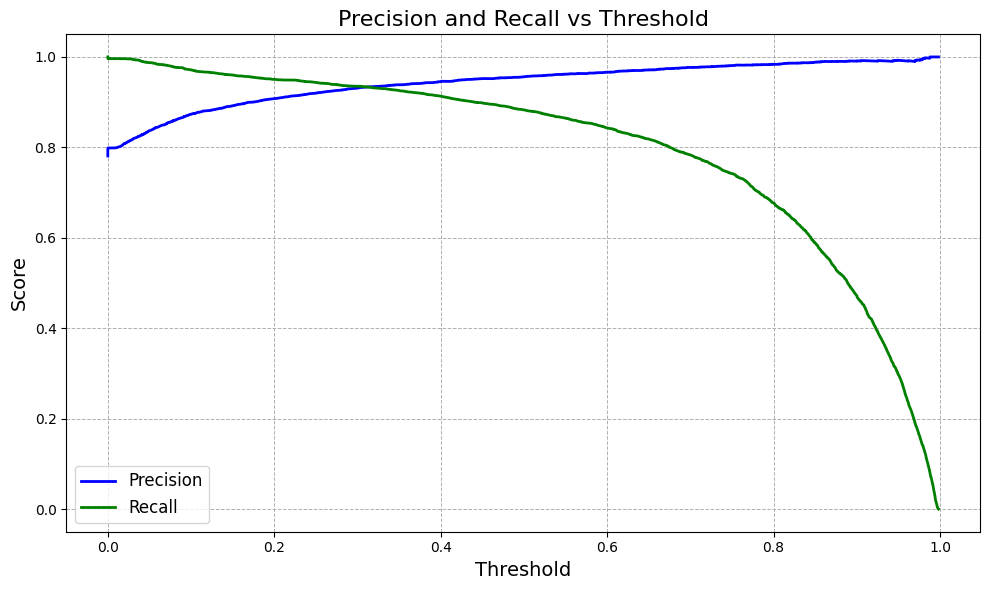

In [143]:
final_model = LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001,class_weight=class_weights)
final_model.fit(X_train, y_train)

y_scores = final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    
  
    plt.plot(thresholds, precisions[:-1], 'b-', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.title('Precision and Recall vs Threshold', fontsize=16)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()  
    plt.show()

plot_prec_recall_vs_thresh(precision, recall, thresholds)




Threshold: 0.40 | Precision: 0.9452
Confusion Matrix:
[[ 928  216]
 [ 354 3726]]

Threshold: 0.50 | Precision: 0.9562
Confusion Matrix:
[[ 979  165]
 [ 478 3602]]

Threshold: 0.60 | Precision: 0.9660
Confusion Matrix:
[[1023  121]
 [ 642 3438]]

Threshold: 0.70 | Precision: 0.9768
Confusion Matrix:
[[1068   76]
 [ 884 3196]]

Threshold: 0.80 | Precision: 0.9836
Confusion Matrix:
[[1098   46]
 [1318 2762]]



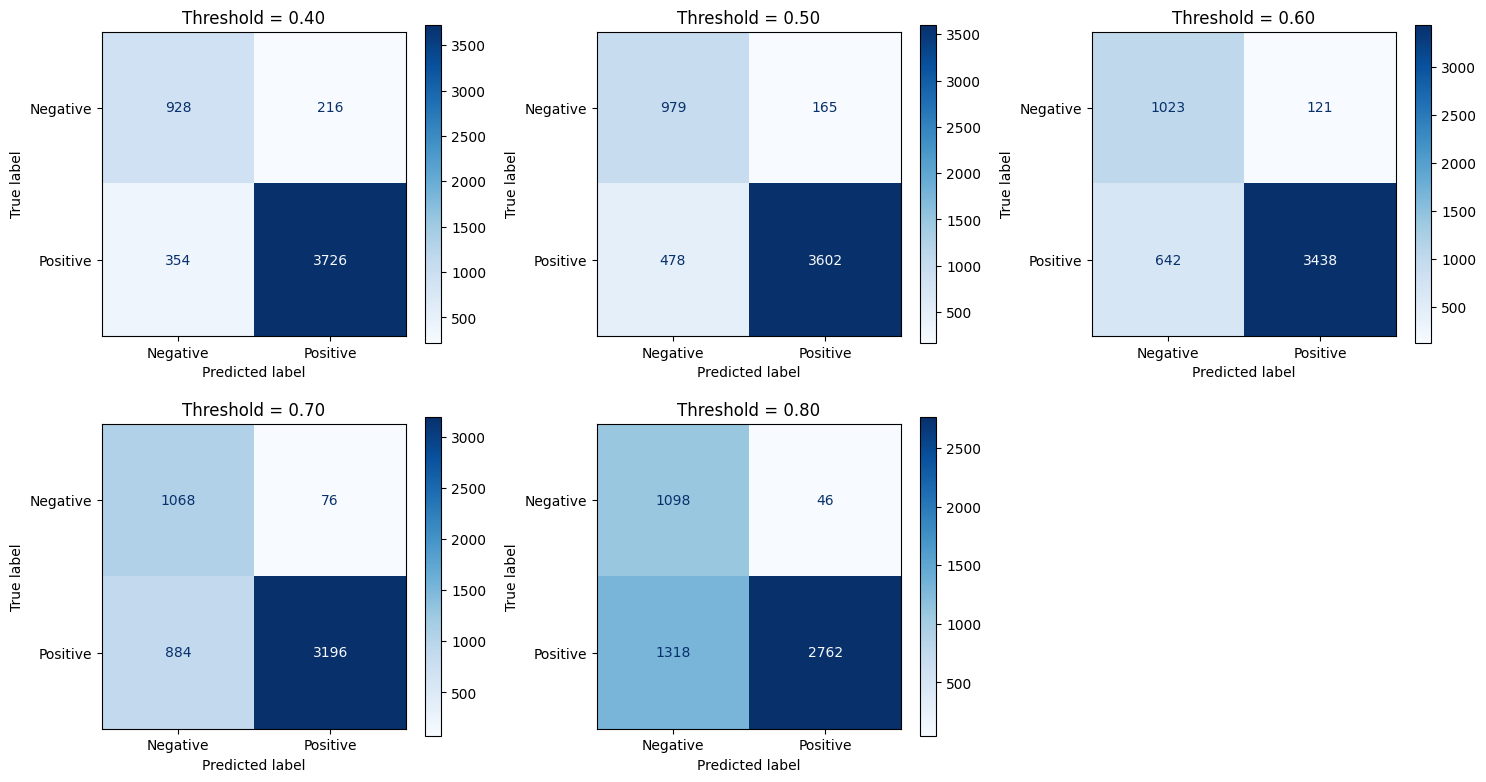

In [144]:
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8]


precision_list = []
confusion_matrices = []


for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)
    
 
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    print(f'Threshold: {threshold:.2f} | Precision: {precision:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

def plot_confusion_matrices(confusion_matrices, thresholds):
    plt.figure(figsize=(15, 8))
    
    for i, cm in enumerate(confusion_matrices):
        plt.subplot(2, 3, i + 1)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title(f'Threshold = {thresholds[i]:.2f}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(confusion_matrices, thresholds)

For a risk-averse loaner, I think it would be wise to choose a threshold of either 0.6 or 0.7. For a risk loving loaner who wants to approve mroe loans a lower threshold such as 0.4 may be chosen.

## Conclusion 

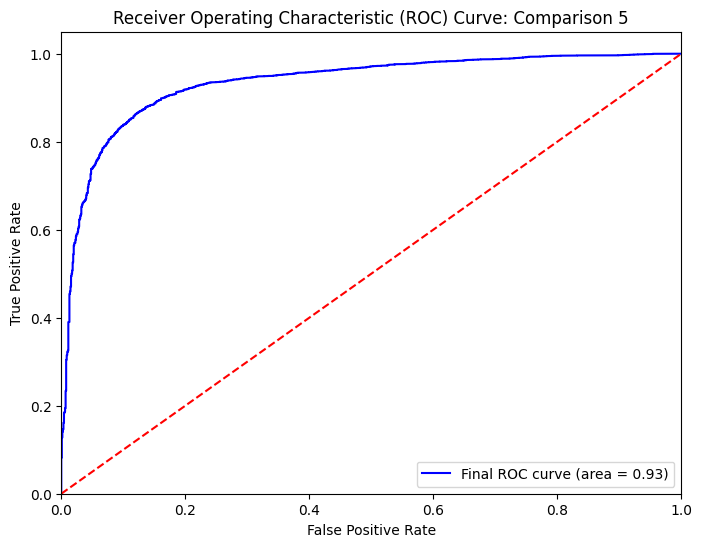

In [76]:
y_scores_final = final_model.predict_proba(X_test)[:, 1]
fpr_fin, tpr_fin, thresholds_fin = roc_curve(y_test, y_scores_final)
roc_auc_fin = auc(fpr_fin, tpr_fin)

plt.figure(figsize=(8, 6))
plt.plot(fpr_fin, tpr_fin, color='blue', label=f'Final ROC curve (area = {roc_auc_fin:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 5')
plt.legend(loc='lower right')
plt.show()

In [65]:
y_pred = (y_scores >= 0.6).astype(int)
recall = recall_score(y_test, y_pred)

print(recall)

0.8426470588235294


To conclude, I noticed that from our changes there was little to no difference between the ROC curves, although our final model appears to perform slightly worse than earlier models which is surprising, making it a not as effective as a metric for us, especially when focusing on precision, so I opted to use confusion matrices more often. 

However our `final_model`, with all the above changes, using a threshold of 0.6 has precision of 0.9660, with a recall of 0.842647 (see above).

We will now look at what appears the have the most potential to be beat this model, which is to use either the under sampling model which had highest false positive rate at threshold = 0.5, or use the non scaled SMOTE which had the highest True Positive Rate but increase the threshold. We will look at SMOTE first.

In [154]:
df = pd.read_csv('my_full_data.csv')
y = df['loan_status'] 
X = df.drop(columns=['id', 'loan_status'])  

In [155]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({1: 16476, 0: 16476})


In [148]:
final_model = LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001)
final_model.fit(X_train_resampled, y_train_resampled)

y_pred_final= final_model.predict(X_test)



precision= precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_final)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Model accuracy score: 0.8821

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75      1144
           1       0.95      0.90      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.86      0.84      5224
weighted avg       0.89      0.88      0.89      5224

Confusion Matrix:
 [[ 945  199]
 [ 417 3663]]
Precision: 0.95
Recall: 0.90
F1 Score: 0.92


Threshold: 0.40 | Precision: 0.9392
Confusion Matrix:
[[ 902  242]
 [ 343 3737]]

Threshold: 0.50 | Precision: 0.9485
Confusion Matrix:
[[ 945  199]
 [ 417 3663]]

Threshold: 0.60 | Precision: 0.9570
Confusion Matrix:
[[ 984  160]
 [ 515 3565]]

Threshold: 0.70 | Precision: 0.9653
Confusion Matrix:
[[1022  122]
 [ 686 3394]]

Threshold: 0.80 | Precision: 0.9747
Confusion Matrix:
[[1063   81]
 [ 957 3123]]



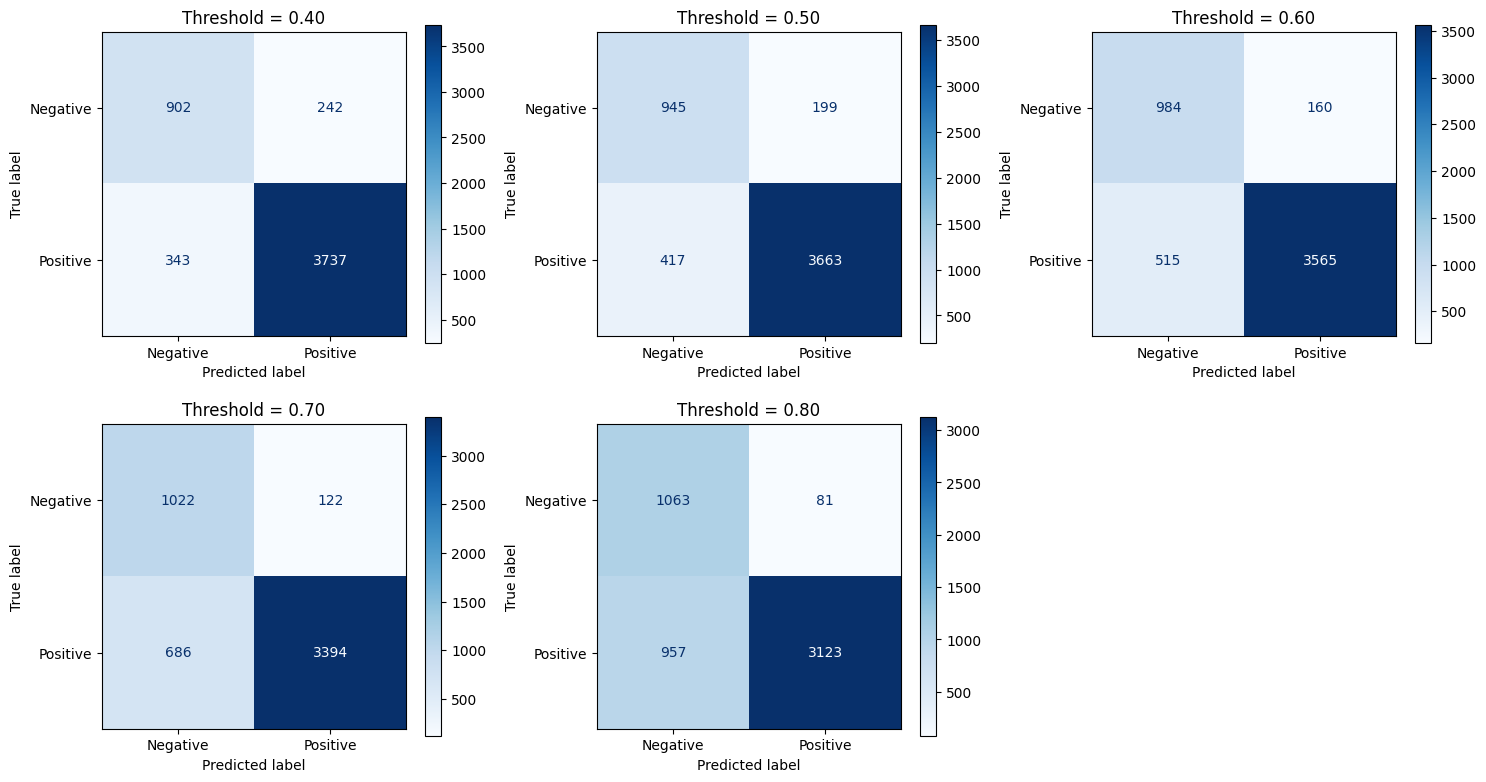

In [152]:
y_scores = final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

thresholds = [0.4, 0.5, 0.6, 0.7, 0.8]


precision_list = []
confusion_matrices = []


for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)
    
 
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    print(f'Threshold: {threshold:.2f} | Precision: {precision:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

def plot_confusion_matrices(confusion_matrices, thresholds):
    plt.figure(figsize=(15, 8))
    
    for i, cm in enumerate(confusion_matrices):
        plt.subplot(2, 3, i + 1)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title(f'Threshold = {thresholds[i]:.2f}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(confusion_matrices, thresholds)



In [153]:
y_pred = (y_scores >= 0.8).astype(int) #0.8 has higher precision than the 0.6, so if it has higher recall we shall use this
recall = recall_score(y_test, y_pred)

print(recall)

0.7654411764705882


It performs worse, so will now have a look at under-sampling

In [156]:
df = pd.read_csv('my_full_data.csv')
y = df['loan_status'] 
X = df.drop(columns=['id', 'loan_status'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

Original dataset shape: Counter({1: 16476, 0: 4418})
Resampled dataset shape: Counter({0: 4418, 1: 4418})


Threshold: 0.40 | Precision: 0.9495
Confusion Matrix:
[[ 947  197]
 [ 379 3701]]

Threshold: 0.50 | Precision: 0.9614
Confusion Matrix:
[[1000  144]
 [ 495 3585]]

Threshold: 0.60 | Precision: 0.9692
Confusion Matrix:
[[1034  110]
 [ 621 3459]]

Threshold: 0.70 | Precision: 0.9781
Confusion Matrix:
[[1072   72]
 [ 867 3213]]

Threshold: 0.80 | Precision: 0.9860
Confusion Matrix:
[[1104   40]
 [1264 2816]]



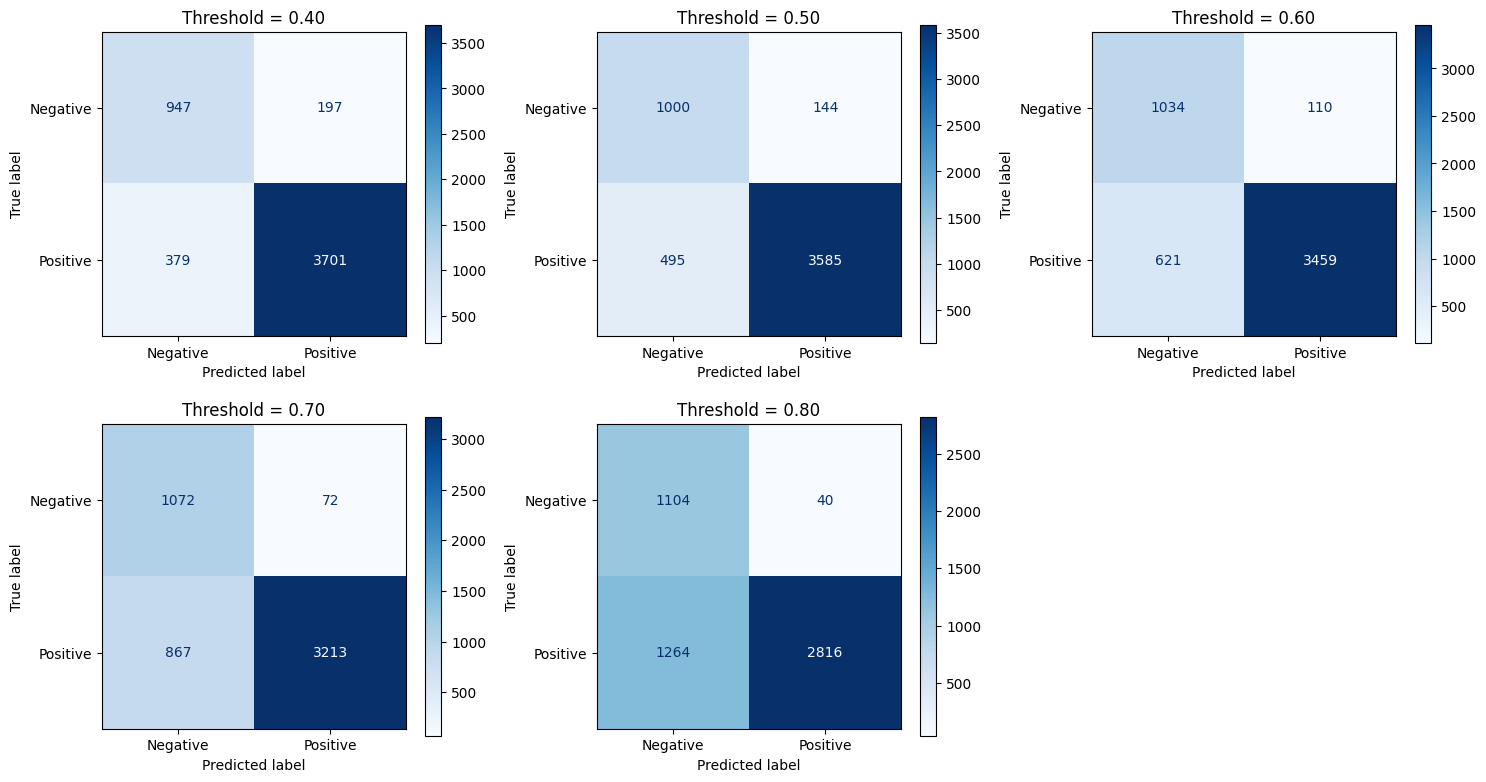

In [160]:
final_model = LogisticRegression(C=100, penalty='l1',max_iter=500,solver= 'liblinear', tol=0.0001)
final_model.fit(X_train_resampled, y_train_resampled)

y_pred_final= final_model.predict(X_test)




y_scores = final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

thresholds = [0.4, 0.5, 0.6, 0.7, 0.8]


precision_list = []
confusion_matrices = []


for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)
    
 
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    print(f'Threshold: {threshold:.2f} | Precision: {precision:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

def plot_confusion_matrices(confusion_matrices, thresholds):
    plt.figure(figsize=(15, 8))
    
    for i, cm in enumerate(confusion_matrices):
        plt.subplot(2, 3, i + 1)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title(f'Threshold = {thresholds[i]:.2f}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(confusion_matrices, thresholds)

In [161]:
y_pred = (y_scores >= 0.6).astype(int) 
recall = recall_score(y_test, y_pred)

print(recall)

0.8477941176470588


This performs very marginally better at threshold= 0.6 without having to reduce dimensionality and scale features.

We found that many changes made very minor changes to the model so without more sophisticated techniques and a larger data set it becomes very hard to increase the performance (precision mainly) of the logisitic regression classifier.